![Atmos CEE Masthead](http://kyrill.ias.sdsmt.edu/SDMines_Livery/AES_CEE_Masthead.png)

# Plotting 201: Intro to Fancy Plotting in Python ("Axes" and "Themes") 

## Warning

Typos are Legion

## Introduction

This is a deep dive with a lot of repeative plotting to demonstrate how features are added to a graphical object and the impact each one makes to the entire product.  The goal with this stragegy is that it will let us slowly explore how the more advanced graphics in Python work, albiet at the cost of a much longer Python notebook.

In this "Let's Play" session, we will explore the more complex aspects of plotting graphics beyond the simple way that we've been doing it through the semester. 

One reason for this is that when one goes to the "online 'help,'" the examples that are often provided for "how to make a plot" for example tends to expect a user to jump in and intuit what is happening.

Personally for me, this is an engraved invitation to rage quit, which I did -- more than once -- when transitioning to Python.  Therefore, in this session we are going to slow-roll the process of making "Fancy Plots" one command at a time.  

## Prerequisite Skills

To play along with this deep-dive you should have the following 

*  Some basic math functions and arrays with the [Numpy](https://numpy.org) Library.
*  Simple graphs in [MatPlotLib](https://matplotlib.org), including axis (with an i) labels, legends and titles, and changing colors, markers and line styles.


## Parts of a Python Graph

Before we start though, we should address the basic parts of a chart in "Pythonese." And mind you there is going to be some frustrating uses of nearly identical terms that mean very different things!

So far we have been working with just the [matplotlib.pyplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) interface.  This does a lot of things automatically "under the hood" but we'll be needing to dig our fingers into these back workings to access some of the plotting features if we indeed wish to be fancy.

A sketch of the main big-picture parts of a Python figure is shown below and is taken from an earlier version of the Matplotlib documentation.

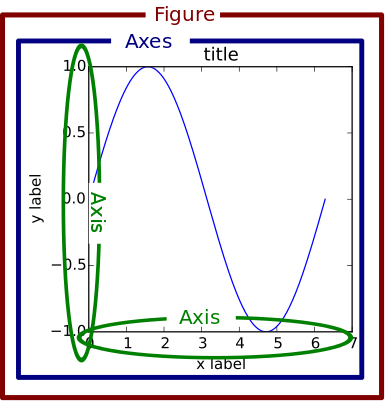

This is a somewhat busy plot, and there are worse ones out there in the newer versions of Matplotlib documentation but for now this is going to keep us *more* than busy.

If we look at the plot's features going from the higher-order objects representing the whole figure space down to the lower-level ones that reflect the basic details.

*  The [__Figure__](https://matplotlib.org/stable/api/figure_api.html):  Just that.  The big graphical object that, if you were to right click or drag off of your Jupyter Notebook, would be isolated as a single PNG, JPEG, GIF, etc.  Modern "OK, Boomer" types call it the "canvas." (I was trained from the before-times to call this the "workstation," reflecting back to the days when we had a special stand-alone computer monitor to just handle graphics.  Some software like NCAR Graphics still uses that notation.)

*  The [__Axes__](https://matplotlib.org/stable/api/axes_api.html):  This is where explaining Python graphics gets messy, as you can guess.  The GOOD news is that in plain language is that it is an indivisuated subplot within the figure.  You can have one subplot (we typically are doing that without realizing it with just the [plt.plot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) command) or many.  The BAD news is that the developers of the language decided to call it the same name as the plural of axes (i.e., the lines where your x and y numbers go).  Again, just pretend in your mind that Axes is some exotic foreign langauge for "subplot."  And yes.  I have taken this question to ~Smack~ Stack Exchange -- and I suspect I've been put on some hairtrigger ban list should I ask another unanswerable question like why HTML output in a Juptyer Lab notebook comes out as a fancy JSON object.

*  The **real** ["Axis"]:  These are the things that come to mind when you probably think of "axes."  And I'm not sure what the plural of the Axis (or for that matter Axes)  are in the context of commingling them with multiple ~Axes~ ~Axises~ ~Axices~ ~Axi~ ~Axeseseseses~ more than one suplot.

In short, each of these three elements can be broken down into parallel indivisual components.

Your document can have more than one Figure,  each with its own goodies.

Your figure can have more than one ~Axes~ subplots or pannel, each with its own items and data, and can even have a map in one subplot, an x-y plot in another, a polar or ternary (triangular) plot in a third, and 3-D plot, in the last one.  

And finally, any given ~Axes~ subplot, can have its own $x$, $y$, $z$, $r$, $\theta$ or $\phi$ axes, each with their own units, labels, tickmarks, etc.

So far we have been only been woring with one "Axes" in our Figures, even when we overlayed multiple lines or scatter-spots on it.  As we play here, we will be digging into making more than one "Axes" (subplots) and also digging into specific elements of our graphics.

## Libraries

For this exercize we are going to keep things restricted to just graphics.  We'll need a few math operations but otherwise we are not going to make too much of a mess.

* [Numpy](https://numpy.org), our standard numerical manager in python
* [MatPlotLib](https://matplotlib.org)'s PyPlot and a few other features

Against my better judgement I am adding plotting "themes" to the tutorial.  Some "basic" examples will have this as part of the activity even though it isn't moving the plot.  This will include one new library:

* [Seaborn](https://seaborn.pydata.org), an extention to Matplotlib that is mostly targeted towards statistical plots.  We will only be using the "themes" part of Seaborn.  Also we won't be using it until the end of this session.


In [1]:
########################################################
#
# Python Libraries
#

#
# Numpy for arrays and basic math
#

import numpy as np

#
# MatPlotLib's Liraries
# 

#   Pyplot for basic plotting

import matplotlib.pyplot as plt

# Seaborn plotting extentions

import seaborn as sns

#
########################################################

## Grounding Ourselves with a Simple Plot

To start things off, let's establish a simple function representing a wave system:

$$f(t)=1 +  e^{-t/100} \space \sin{t}$$

where $t$ goes from 0.1 to 10 using our [numpy.linspace()](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function that we've been using in this class. The sine, [numpy.sin()](https://numpy.org/doc/stable/reference/generated/numpy.sin.html), and exponential, [numpy.exp()](https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp) functions are, likewise, basic [numpy math functions](https://numpy.org/doc/stable/reference/routines.math.html).  The "plus one" is there so we can use a log axis (or two log axissessess).

In [2]:
########################################################
#
# Our Poster Function with the day.
#

t = np.linspace(start =   0.1, 
                stop  = 100.0, 
                num   =  1000)

wave_func = 1 + np.sin(t) * np.exp(-t/100) 

#
########################################################

## The Devil We Know

Let's make a couple simple, but street-legal plot of our function using [matplotlib.pyplot.plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) and it's three log-friends, [matplotlib.pyplot.loglog](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.loglog.html), [matplotlib.pyplot.semilogx()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html), and [matplotlib.pyplot.semilogy()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.semilogx.html).

Also notice the trick where you can slide in LaTeX equations into the text by preceeding any string with just a plain letter *r*.  Also, make a mental note that exponents in the default-sized graphs in Jupyter Notebooks may be tiny.

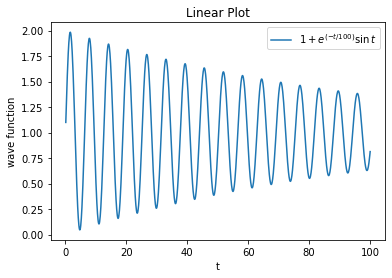

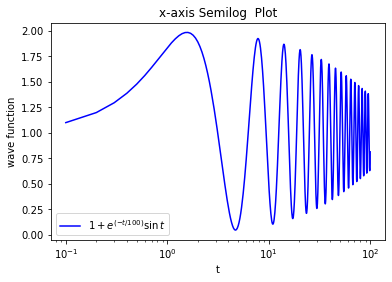

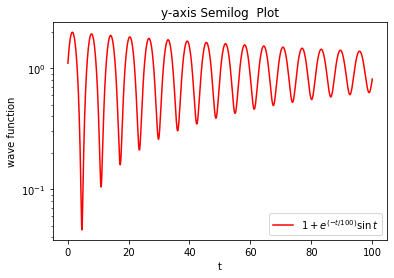

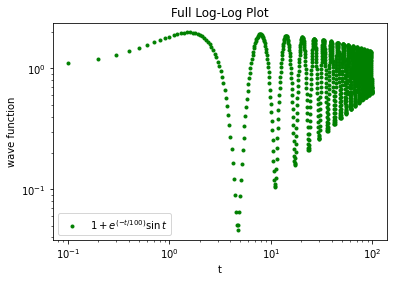

In [3]:
########################################################
#
# Some basic plots of our function
#

# Fully Linear Axes 

plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Linear Plot")                    # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.

# Semilog on the x-axis w/ a simple grid

plt.semilogx(t, wave_func, 
             color = "blue")                 # let's now customize the plot colors
plt.title("x-axis Semilog  Plot")
plt.xlabel("t")
plt.ylabel("wave function")
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"])
plt.show()

# Semilog on the y-axis 

plt.semilogy(t, wave_func, 
             color = "red")                  
plt.title("y-axis Semilog  Plot")
plt.xlabel("t")
plt.ylabel("wave function")
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"])
plt.show()

# Full Log Plot (using points and no line)

plt.loglog(t, wave_func, 
           color = "green", 
           linestyle="none",                 # let's just have dots
           marker=".")                       #   and no connecting lines
plt.title("Full Log-Log Plot")
plt.xlabel("t")
plt.ylabel("wave function")
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"])
plt.show()

#
########################################################

These are decent basic plots but there may be some things you may want to do with them.

For example, 


* Express the linear x-axes as factors of $\pi$
* Add minor ticks to the linear axes (whose singular is axis). Ttoday it will just be the x-axis).  Also, notice how it added nice log minor ticks to the log axes as a "default" setting.
* Merge all of them into a single figure.  (And we can get really clever with how we organize the plots to minimize clutter.)

But to do most of these operations we will need to depart from our confort zone and start getting into the weeds of the Figure, Axes, and Axis operators.

## Polar Plots

You also can make polar plots for certain applications.  Polar on a single "non Axes" quick-n-easy case is pretty easy, instead of an x and y coordiante system it is a angle and radius system.  You can access the tool for a polar plot with [matplotlib.pyplot.polar()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.polar.html).

This will get more complicated if we start making multiple plots on a given panel.


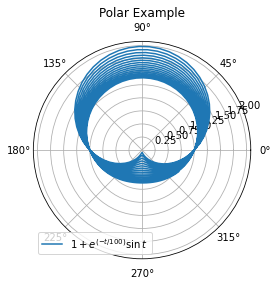

In [4]:
########################################################
#
# Simple Polar Plot Example
#

plt.polar(t,          # your angle
          wave_func)  # your radius
plt.title("Polar Example")
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"])
plt.show()

#
########################################################

## Fancy Tick-Fu and Making our First Non-"Basic" Plot

Let's start by just taking the linear plot and begin making small modifications bit by bit so you can see how using the more advanced fatures in matplotlib bring thing together.  

### The Creating the Figure and Axes

To start we will be making a new fresh figure.  The command to best do this is the [matplotlib.pyplot.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) function. 

This will acutally create TWO output "variables."  One is the figure object (we're calling it "fig").  The other is the Axes object which is typically called "ax."

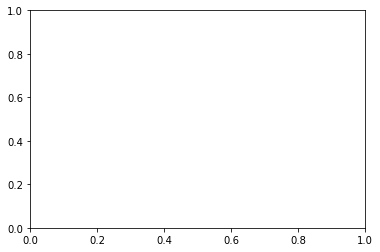

In [5]:
########################################################
#
# Making a single panel plot with some simple frills.
#
# (1) Dropping the Figure and Axes elements (and nothing else!)
#

fig, ax = plt.subplots()

#
########################################################

Exciting!  

OK it's not exciting, but this represents the dropping of a "blank" graph.

### Adding a simple x-y plot.

Don't like the size?  While the Python Notebook will try to scale the graph if you make it too large, you can make it bigger.  (We'll do that latter.. we also can make it it have multiple "panels.")

Now let's now create, in our Figure, a simple plot...

Ooops.  It's not going into the *Figure*.  It's going into our one and only "Axes" (still strangly singular, but hopefully this madness will show its method as we go.)

We're just going to place a traditonal line plot w/o any frills into the plot area.

This command will work and behave just like the one we've been using with the plt.plot command, but it sits under the "Axes" area in our Matplotlib library: [https://matplotlib.org/stable/api/axes_api.html#plotting](https://matplotlib.org/stable/api/axes_api.html#plotting) and it mostly works just like our old friend.

(Notice that I am not dropping the closing [plt.show()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) command.  I'm saving that for the end.

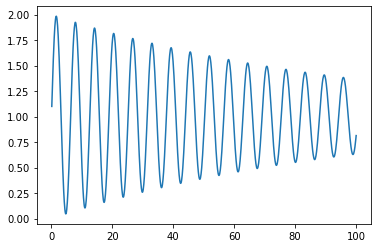

In [6]:
########################################################
#
#
# STILL Making a single panel plot with some simple frills.
#
# (1) Dropping the Figure and Axes elements 
# (2) Adding the "plot" to our Axes inside the Figure
#

fig, ax = plt.subplots()
ax.plot(t, wave_func)

#
########################################################

### Titles and AxIs Labels and Legends (Ohhhh Myyyyyy!)

Uh oh.  Your TA with the red pen is passive-agressively gazing over your shoulder.  Better put some labels on the plot.

And here is where we start diverging from what you may be expecting.  

First we can have TWO titles.  One for the Figure and one for each Axes ("thinking the subplots with a capital-A helps me cope with the homonymns."  This is the "supertitle" or [matplotlib.Figure.suptitle()](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.suptitle).

You can still have an individual title and legend for each subplot with these tools:

[https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend](https://matplotlib.org/stable/api/axes_api.html#axis-labels-title-and-legend) ...

...but many of the functions that said ".ylabel" or ".title" will be changed to ".set_title", ".set_xlabel" etc.  (".legend" stays the same!)

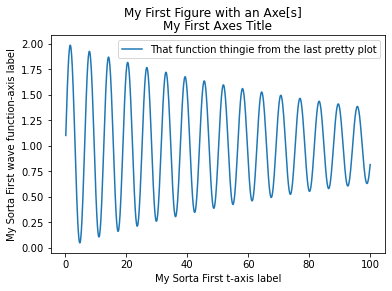

In [7]:
########################################################
#
#
# STILL Making a single panel plot with some simple frills.
#
# (1) Dropping the Figure and Axes elements 
# (2) Adding the "plot" to our Axes inside the Figure
# (3) Adding the Labels to the Axis'esseseses
# (4) Adding the title to the "AXES"
# (5) Adding a Legend (even though we only have one plotted variable)
#

fig, ax = plt.subplots()
ax.plot(t, wave_func)
fig.suptitle("My First Figure with an Axe[s]")
ax.set_title("My First Axes Title")
ax.set_xlabel("My Sorta First t-axis label")
ax.set_ylabel("My Sorta First wave function-axis label")
ax.legend(["That function thingie from the last pretty plot"])

#
########################################################

### ~Micromanaging~ Customizing finer elements on the x- and y-Axe... Axi?

#### Axis Major Ticks

Now things are going to get strange.  If you want to start manipulating the x- and y- axes you will have dig a little deeper and it's not all that easy.  (In fact I only do this when I absolutely have to.)

The various tick commands, objects and operators are here: 
[https://matplotlib.org/stable/api/axes_api.html#ticks-and-tick-labels](https://matplotlib.org/stable/api/axes_api.html#ticks-and-tick-labels)

Here I am going to recommend keeping it as simple as possible (if you have to at all!).

There are two ways you can do this:

*  The first is to assign specific major tick points using [matplotlib.Axes.set_xticks or matplotlib.Axes.set_yticks](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html#matplotlib.axes.Axes.set_xticks).  These can include specific values or an ordered array.

*  Both are demonstrated here.


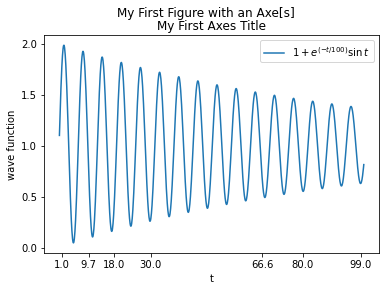

In [8]:
########################################################
#
#
# STILL Making a single panel plot with another kind of not-so simple frills.
#
# (1) Dropping the Figure and Axes elements 
# (2) Adding the "plot" to our Axes inside the Figure
# (3) Adding the Labels to the Axis'esseseses
# (4) Adding the title to the "AXES"
# (5) Adding a Legend (even though we only have one plotted variable)
# (6) Modifying our Major Ticks on our Axeseseseses for regular intervals
#

fig, ax = plt.subplots()

fig.suptitle("My First Figure with an Axe[s]")

ax.plot(t , wave_func)

ax.set_title("My First Axes Title")
ax.set_xlabel("t")
ax.set_ylabel("wave function")
ax.legend([r"$1 + e^{(-t/100)} \sin{t}$"])


# Arbitrary specificed manual ticks (x-axis)
ax.xaxis.set_ticks([1,9.7,18,30,66.6,80,99])

# Orderly even spaced manual ticks (y-axis)
ax.yaxis.set_ticks(ticks = np.arange(0,2+0.5,0.5))


#
########################################################

... the other way which isn't as scary as it looks is to just say, "gimme a major tick every x number of values."  This uses two new ones. [matplotlib.axis.set_major_locator](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html?highlight=set_major_locator#matplotlib.axis.Axis.set_major_locator) and to specify where things go, use the function [matplotlib.ticker.MultipleLocator()](https://matplotlib.org/stable/api/ticker_api.html?highlight=multiplelocator#matplotlib.ticker.MultipleLocator)

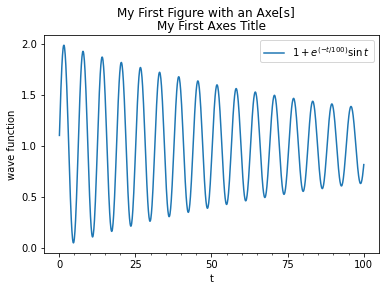

In [9]:
########################################################
#
#
# STILL Making a single panel plot with another kind of not-so simple frills.
#
# (1) Dropping the Figure and Axes elements 
# (2) Adding the "plot" to our Axes inside the Figure
# (3) Adding the Labels to the Axis'esseseses
# (4) Adding the title to the "AXES"
# (5) Adding a Legend (even though we only have one plotted variable)
# (6) Modifying our Major (and minor) Ticks on our Axeseseseses for regular intervals
#

fig, ax = plt.subplots()

fig.suptitle("My First Figure with an Axe[s]")

ax.plot(t , wave_func)

ax.set_title("My First Axes Title")
ax.set_xlabel("t")
ax.set_ylabel("wave function")
ax.legend([r"$1 + e^{(-t/100)} \sin{t}$"])


# Regular Tick Spacing (the system will pick the start and end points)
ax.xaxis.set_major_locator(plt.MultipleLocator(25))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

# this trick works on minor ticks too!

ax.xaxis.set_minor_locator(plt.MultipleLocator(5))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.5))

#
########################################################





#### Customizing values and formats for major ticks.  (This is overkill even for me on most days!)

Before moving to the minor ticks, that x axis is representing cycles of the sine wave.  It is sometimes the convention to do this in intervals of pi,  You acutally can be [too] clever here by rescaling your x axis values and then changing the format.

This is done with a similar operator to the above: [matplotlib.axis.get_major_formatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axis.Axis.get_major_formatter.html#matplotlib.axis.Axis.get_major_formatter)

The downer here (and one reason why I don't go this far on even a bad day), is the means of formatting.  There's some explanations of this in the code documetation comments in treh code block below.



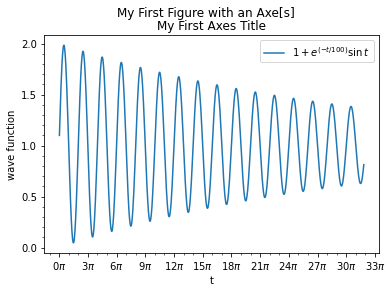

In [10]:
########################################################
#
# Our simple plot has now jumped through the Overton Window*
#
# (1) Dropping the Figure and Axes elements 
# (2) Adding the "plot" to our Axes inside the Figure
# (3) Adding the Labels to the Axis'esseseses
# (4) Adding the title to the "AXES"
# (5) Adding a Legend (even though we only have one plotted variable)
# (6) Modifying our Major/Minor Ticks on our Axeseseseses for regular intervals
# (7) Making a fancy format for our x axis to include pi
#

fig, ax = plt.subplots()

fig.suptitle("My First Figure with an Axe[s]")

ax.plot((t/np.pi) , wave_func)

ax.set_title("My First Axes Title")
ax.set_xlabel("t")
ax.set_ylabel("wave function")
ax.legend([r"$1 + e^{(-t/100)} \sin{t}$"])


# Regular Tick Spacing (the system will pick the start and end points)

ax.xaxis.set_major_locator(plt.MultipleLocator(3))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.5))

ax.xaxis.set_minor_locator(plt.MultipleLocator(1))
ax.yaxis.set_minor_locator(plt.MultipleLocator(0.1))

# Regular Tick Spacing (the system will pick the start and end points)
#
#   The format string in the parenthesis will do the following (in order of
#   it's apperance below:

#   The curly brackets is the python format operator.  I rarely play with
#      this.

#      the x separated from everything else with the ":" is the is the 
#      name of the variable you want to format, here x is the placeholder
#      for whatever variable you want on the x axis. 
#
#      the .0f means the following:
#          "the 'f'": this will be printed as a decimal [floating point number.]
#                a 'd' would indicate an integer style output
#          "the '.0"; no numbers before the decimal point means that 
#               there will be no leading zeros or padded space before
#               the first noticable number. Meanwhile the number after
#               the decimal is the precision of the displayed value.
#               In this case there is zero decimal places tothe right of 
#               the decimal.
# 
#      The plus and the string that follows (notice the r which as before
#           indicates that you are going to use a LaTeX math format) is just
#           tacked on to the end so that we have 1pi, 2pi, 3pi, etc.
#

ax.xaxis.set_major_formatter('{x:.0f}'+r'$\pi$')

# ...and "close the deal!"

plt.show()

#
########################################################


# * A policy wonk and legal term for the breadth of how far to 
#     either side of the center policy and discourse can go
#     before people think that you are leveraging Poe's Law**.
#
# ** The internet addage saying that as extremism grows, it becomes
#        harder to discern fanaticism from parody.
#
# Used in a sentence: "In 2020, Poe's Law jumped out of the huge
#                      hole in the wall left behind when the 
#                      Overton Window beat it to the punch and
#                      jumped out of itself."



## Multi-Panel Plots

Probably the hardest part in the case above was customizing the ticks which is something that I don't do if absolutely necessary. (I've grown fond of minimalist graph design that focuses on the data and what it represents rather than using every plotting feature at my disposal.) 

But the next step will be putting more than one plot on a display.  

This is also something that I often don't do for single "one-off" "do-and-done" plots, in cases like that I just say "#@*$-it!" make them separately and arrange them in Powerpoint, Viso, Adobe, or Keynote.  

But if I am making something that will be done over and over, or if I am making an operational product that's generated automatically or repeatedly, I gulp (but not as much as I used to) and create multipanel plots.  

There are a couple clever ways to do this but I am going to just demonstate a basic two-fisted way to do it.

### From one Axes to multiple Axessesessesses 

To do this we will again use the [matplotlib.pyplot.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) command.  This time though we can chose the number of rows and/or columns we want.  

Let's do an example here.

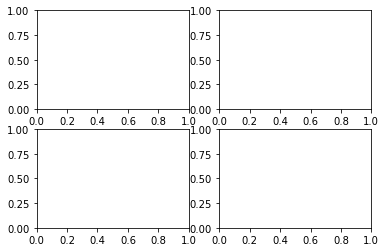

In [11]:
########################################################
#
# Moving to Multiple Plots
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.

fig, ax = plt.subplots(nrows = 2,  # two down
                       ncols = 2)  # two across


#
########################################################

Whoa!  That's a little cramped.  As I said earlier you can make the graphs bigger.  Notice the example below using the *figsize* operator. 

The units, by the way?  Inches!!!  In Jupyter it doesn't mean much but there are ways to export scripts into PDFs and Postscript files where the units actually do matter.  

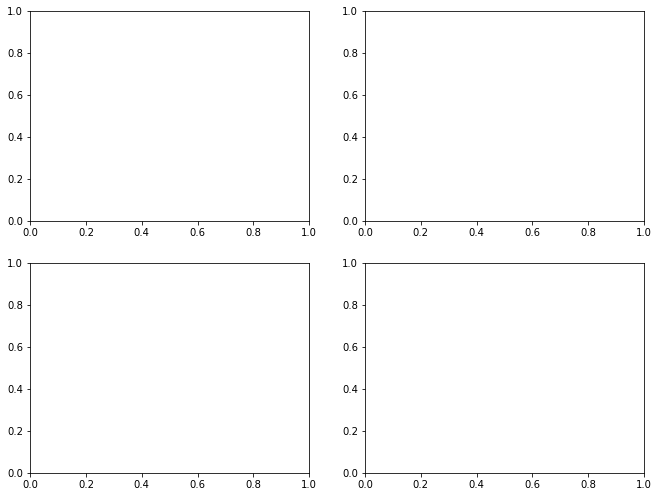

In [12]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5])  # This is my 
                                            #   "goto" length
                                            #   & width for 
                                            #   big plots

#
########################################################

Now we can better see what we'd be putting inside each subplot or "Axes."

Each individual Axes is numbered by row and column in most uses.

Before moving on, how to we determine which box is which and how to access them?   We can illustrate that here by just making some headers for each "Axes".

Text(0.5, 1.0, '11')

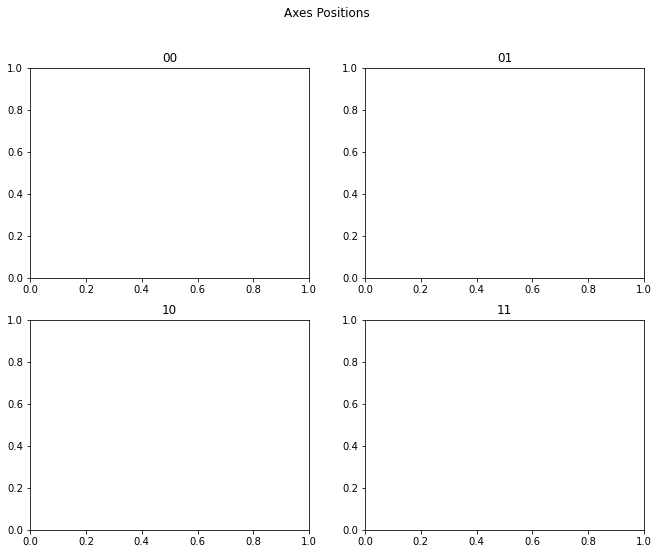

In [13]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
# (2) Making Axes Titles for reference.

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5])

plt.suptitle("Axes Positions")

# Axes [0][0] Upper-Left

ax[0][0].set_title("00")

# Axes [0][1]

ax[0][1].set_title("01")

# Axes [1][0]

ax[1][0].set_title("10")


# Axes [1][1] Lower-Right

ax[1][1].set_title("11")

#
########################################################

And now we can try loading each axes as if it were its own graph.  

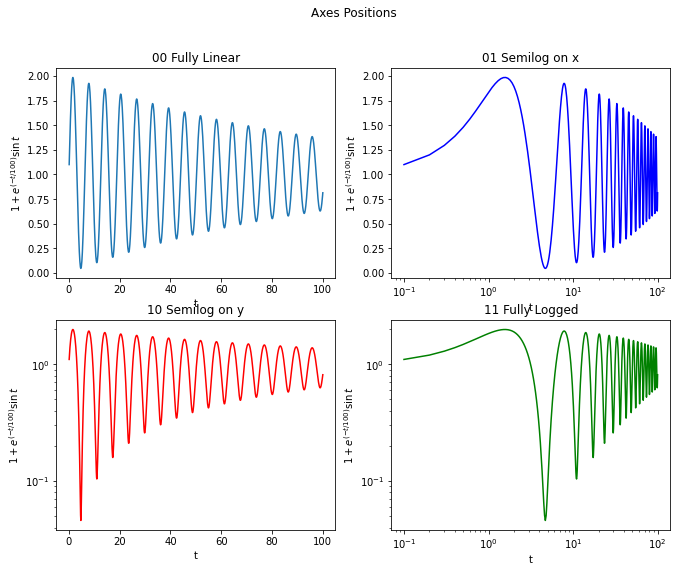

In [14]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
# (2) Making Axes Titles for reference.
# (3) Drop some graphs in each Axes
#     (0)(0) All Linear
#     (0)(1) an X-Semilog
#     (1)(0) an Y-Semilog
#     (1)(1) All Log



fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5])

plt.suptitle("Axes Positions")

# Axes [0][0] Upper-Left

ax[0][0].set_title("00 Fully Linear")
ax[0][0].plot(t, wave_func)
ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [0][1]

ax[0][1].set_title("01 Semilog on x")
ax[0][1].semilogx(t, wave_func, color = "blue")
ax[0][1].set_xlabel("t")
ax[0][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")



# Axes [1][0]

ax[1][0].set_title("10 Semilog on y")
ax[1][0].semilogy(t, wave_func, color = "red")
ax[1][0].set_xlabel("t")
ax[1][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")



# Axes [1][1] Lower-Right

ax[1][1].set_title("11 Fully Logged")
ax[1][1].loglog(t, wave_func, color = "green")
ax[1][1].set_xlabel("t")
ax[1][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

plt.show()


#
########################################################

Now a couple things about this plot.

First it looks cluttered in that the top x-titles are running into the bottom upper titles.   

Plus you'll note that the above example isn't including the polar plot example. Working with multiple panels or any of the more advanced plotting tools with plots in multiple coordinate systems, e.g., we will have to roll up our sleeves.  An example of a plot with a "cartesian" and "polar" plot in the same figure canvas will be shown at the end of this particilar deep-dive.

Also I set it up on purpose so that when you go across the rows, you have the same kind of y-axis.  And if you go down each column, you have the stake ame kind of x-axis.  

There are three ways we can manage this
 
1.  We can limit which plots are labeling their axis'es.   In the [matplotlib.pyplot.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) statement you can set two parameters, **sharex**, and **sharey**.  You can specify whether you share a given axis (x or y) across rows, columns, or both.
 
2.  We can also trim the titles and place the titles inside the plot.

3.  You can use a figure-level command, [plot.tight_layout()],(https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tight_layout.html) which will modify the various Axeses. (An example of this will be used shortly.)

### Sharing Axis parameters across Axes.

Let's do (1) first.  This is using the sharex and sharey modifiers to the [matplotlib.pyplot.subplots()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).

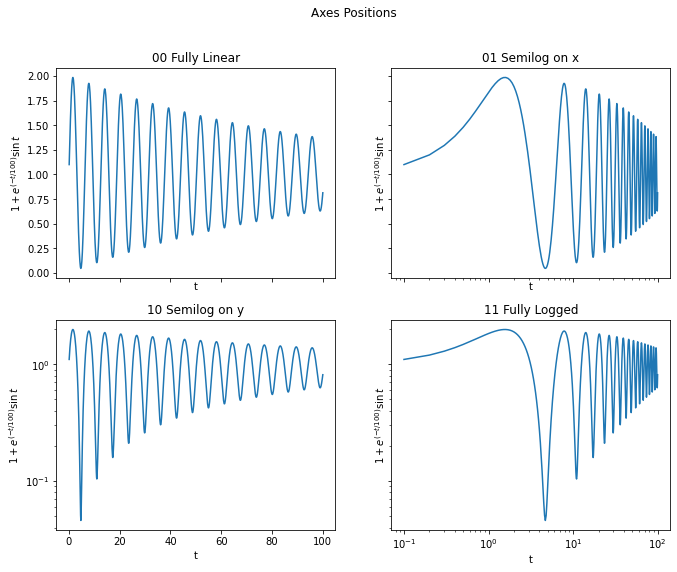

In [15]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
#     Share the X and Y direction's axes
# (2) Making Axes Titles for reference.
# (3) Drop some graphs in each Axes
#     (0)(0) All Linear
#     (0)(1) an X-Semilog
#     (1)(0) an Y-Semilog
#     (1)(1) All Log
# (4) Share the x axis across a given column, and 
#     Share the y axis across a given row.

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5],
                       sharex  =    'col',  # share the x-axis along columns
                       sharey  =    'row')  # share the y-axis along rows

plt.suptitle("Axes Positions")

# Axes [0][0] Upper-Left

ax[0][0].set_title("00 Fully Linear")
ax[0][0].plot(t, wave_func)
ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [0][1]

ax[0][1].set_title("01 Semilog on x")
ax[0][1].semilogx(t, wave_func)
ax[0][1].set_xlabel("t")
ax[0][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][0]

ax[1][0].set_title("10 Semilog on y")
ax[1][0].semilogy(t, wave_func)
ax[1][0].set_xlabel("t")
ax[1][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][1] Lower-Right

ax[1][1].set_title("11 Fully Logged")
ax[1][1].loglog(t, wave_func)
ax[1][1].set_xlabel("t")
ax[1][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

plt.show()

#
########################################################

That's a little better, and we can also clean things up by removing the axes on the "inside of the plots" (the x axis for the top row, and the right columns).

I'm ust going to do this by "commenting out" the undesired labels.

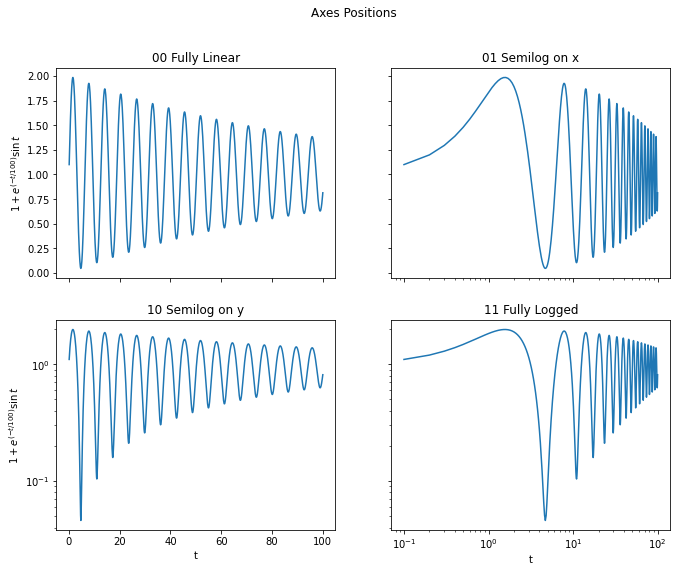

In [16]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
#     Share the X and Y direction's axes
# (2) Making Axes Titles for reference.
# (3) Drop some graphs in each Axes
#     (0)(0) All Linear
#     (0)(1) an X-Semilog
#     (1)(0) an Y-Semilog
#     (1)(1) All Log
# (4) Share the x axis across a given column, and 
#     Share the y axis across a given row.
# (5) Trim the fat off the axis labels
#

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5],
                       sharex  =    'col',
                       sharey  =    'row')

plt.suptitle("Axes Positions")

# Axes [0][0] Upper-Left

ax[0][0].set_title("00 Fully Linear")
ax[0][0].plot(t, wave_func)
# ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [0][1]

ax[0][1].set_title("01 Semilog on x")
ax[0][1].semilogx(t, wave_func)
# ax[0][1].set_xlabel("t")
# ax[0][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][0]

ax[1][0].set_title("10 Semilog on y")
ax[1][0].semilogy(t, wave_func)
ax[1][0].set_xlabel("t")
ax[1][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][1] Lower-Right

ax[1][1].set_title("11 Fully Logged")
ax[1][1].loglog(t, wave_func)
ax[1][1].set_xlabel("t")
#  ax[1][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

plt.show()

#
########################################################

Don't like the big empty? There is an option to make the layout tight:  [matplotlib.tight_layout()](https://matplotlib.org/stable/api/tight_layout_api.html).  Ironically, this will help with plots that are too loose, or too tight.

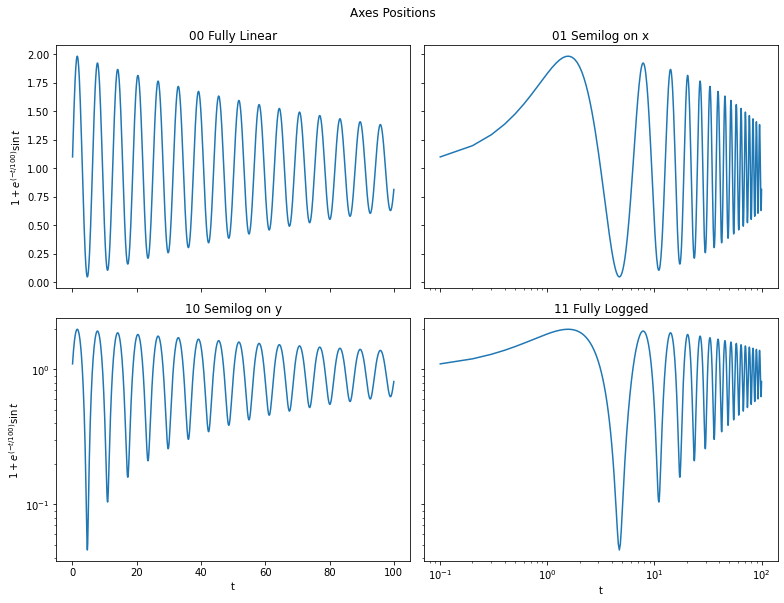

In [17]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
#     Share the X and Y direction's axes
# (2) Making Axes Titles for reference.
# (3) Drop some graphs in each Axes
#     (0)(0) All Linear
#     (0)(1) an X-Semilog
#     (1)(0) an Y-Semilog
#     (1)(1) All Log
# (4) Share the x axis across a given column, and 
#     Share the y axis across a given row.
# (5) Trim the fat off the axis labels
# (6) Tighten the whitespaces
#

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5],
                       sharex  =    'col',
                       sharey  =    'row')

plt.suptitle("Axes Positions")

# Axes [0][0] Upper-Left

ax[0][0].set_title("00 Fully Linear")
ax[0][0].plot(t, wave_func)
# ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [0][1]

ax[0][1].set_title("01 Semilog on x")
ax[0][1].semilogx(t, wave_func)
# ax[0][1].set_xlabel("t")
# ax[0][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][0]

ax[1][0].set_title("10 Semilog on y")
ax[1][0].semilogy(t, wave_func)
ax[1][0].set_xlabel("t")
ax[1][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1][1] Lower-Right

ax[1][1].set_title("11 Fully Logged")
ax[1][1].loglog(t, wave_func)
ax[1][1].set_xlabel("t")
#  ax[1][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

plt.tight_layout()
plt.show()

#
########################################################

### Adding Annotations 

I am literally doing this just for *you* because I REALLY hate doing this. This is another thing I do "in post" with Powerpoint, Keynote, Adobe or Keynote.  You can add text objects to your plots.  This can make them look more cluttered. In this case I am trying to do this to remove the over-titles for each Axes graph.  

This is using the function [matplotlib.Axes.text](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) and it is rather high-maintenance (hence me not wanting to do this).

First you need to pick a coordinate pair to drop your graph.  This also means that you can chose coordinates relative to your figure or your specific Axis, or the acutal x-y's of your plot.

To do the latter and if you are not asking to use your graphs x- and y-axis coordinates, you will need to use a "transform" operator.   (You have to do this when you use maps.)

You also can chose the alignment of what corner or side of your textbox your x-and-y of your text coordinate will go.

Finally for any text (axis'es, titles, etc.) you can also select a relative text size: 'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'

The first annotation for Axes 0-0 has comments to describe them if you REALLY REALLY one to use it.

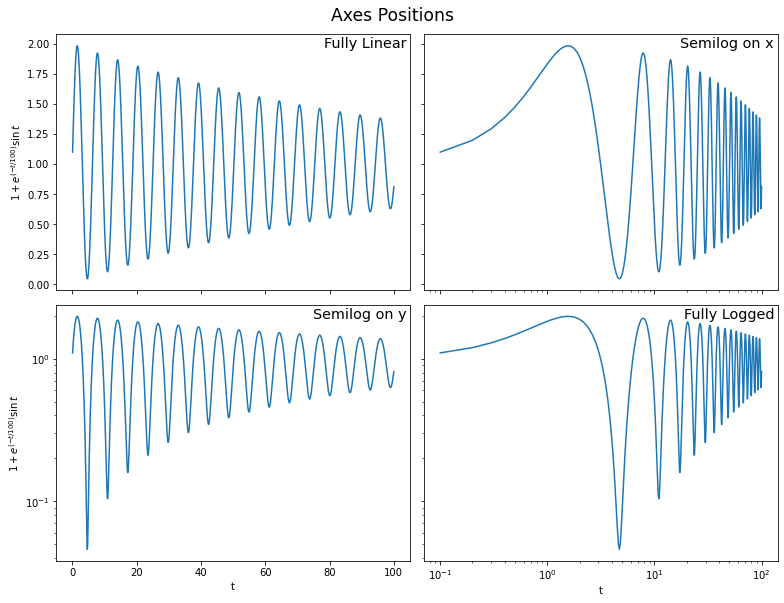

In [18]:
########################################################
#
# Mutiplot Example
#
# (1) Dropping the Figure and Axes elements (this time a 2x2)
#     display.  This time making it big enough for us to see!!!
#     Share the X and Y direction's axes
# (2) Making Axes Titles for reference.
# (3) Drop some graphs in each Axes
#     (0)(0) All Linear
#     (0)(1) an X-Semilog
#     (1)(0) an Y-Semilog
#     (1)(1) All Log
# (4) Share the x axis across a given column, and 
#     Share the y axis across a given row.
# (5) Trim the fat off the axis labels
# (6) Tighten the whitespaces 
# (7) Replace the titles with Text Annotations

fig, ax = plt.subplots(nrows   =        2,
                       ncols   =        2,
                       figsize = [11,8.5],
                       sharex  =    'col',
                       sharey  =    'row')

plt.suptitle("Axes Positions",
             size = 'xx-large') # you can make things big or small!

# Axes [0][0] Upper-Left

#ax[0][0].set_title("00 Fully Linear")
ax[0][0].plot(t, wave_func)
# ax[0][0].set_xlabel("t")
ax[0][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")
ax[0][0].text(0.99, 
              0.99, 
              'Fully Linear',
              size                = 'x-large',
              horizontalalignment = 'right', 
              verticalalignment   = 'top',
              transform           = ax[0][0].transAxes)


# Axes [0][1]

#ax[0][1].set_title("01 Semilog on x")
ax[0][1].semilogx(t, wave_func)
# ax[0][1].set_xlabel("t")
# ax[0][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")
ax[0][1].text(0.99,                               # X
              0.99,                               # Y 
              'Semilog on x',                     # Text
              size                = 'x-large',    # Font Size
              horizontalalignment = 'right',      # Put me at the
              verticalalignment   = 'top',        #.  Top-RIght Corner
              transform           = ax[0][1].transAxes) # relative to the plot.



# Axes [1][0]

# ax[1][0].set_title("10 Semilog on y")
ax[1][0].semilogy(t, wave_func)
ax[1][0].set_xlabel("t")
ax[1][0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")
ax[1][0].text(0.99, 
              0.99, 
              'Semilog on y',
              size                = 'x-large',
              horizontalalignment = 'right', 
              verticalalignment   = 'top',
              transform           = ax[1][0].transAxes)


# Axes [1][1] Lower-Right

#ax[1][1].set_title("11 Fully Logged")
ax[1][1].loglog(t, wave_func)
ax[1][1].set_xlabel("t")
#  ax[1][1].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")
ax[1][1].text(0.99, 
              0.99, 
              'Fully Logged',
              size                = 'x-large',
              horizontalalignment = 'right', 
              verticalalignment   = 'top',
              transform           = ax[1][1].transAxes)

plt.tight_layout()
plt.show()

#
########################################################

## Plotting Multiple Projections/Transforms in the Same Figure

While you can make more than one kind of cartessian plot on the same figure "canvas" (e.g., a log-x, log-y and log-log plot).  Changing to a very different transform (e.g., plotting a linear plot along side a polar plot takes a little more work.

### Axes Subplots by panel

So far we have declared all of our subplots in a figure at once.  That works so far and will probably serve you well in most uses.  But one problem with this setup is that you can either declare all of your plots up front with a single "transform" or "projection."  Otherwise you have to do them one at a time.

When I say projection and transform, I mean the "mapping" in your plotting coordinate space.  For example cartesian is just x and y.  Polar projections are mapped to angle and radius.  Map projections are mapped to a map east and north distance from a given point but you can "transform" a plot statement to be in lat-lon space.

If you want one graph a plain cartesian plot, another in Merator map coordinates, a third in polar coordinates, and a fourth in polar sterographic map coordinates.  You need to overwrite each subplot with its own new subplot.  It's not *that* hard but it looks wierd when you do it.

Here we take the command [matplotlib.pyplot.subplot()](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html) (singular!)

This will drop ONE Axes workspace for you.

BUT.  The coordinates arguments are wierd.  Here is the syntax we'll use below to place our polar plot in the second Axes position.

```
ax[1] = plt.subplot(1,  # put me in row-positon 1 where 1 is the starting value)
                    2,  # put me in column-positon 2 where 1 is the starting)
                    2,  # The full space of work will be in position 2
                        #    starting at 1.  You acutally can use this third
                        #    position to take control of more than one Axes
                        #    space for one graph.  I haven't tried this nor
                        #    do I plan to in the near future because this
                        #    is messy enough!
                    projection='polar') # OK this part is where things make 
                                        # make sense again!  Here is your
                                        # projection in which you will
                                        # warp your cartesian space on the
                                        # 2-d workspace into your new coordinate
                                        # system.


```

When plotting the default system will match the system here.  

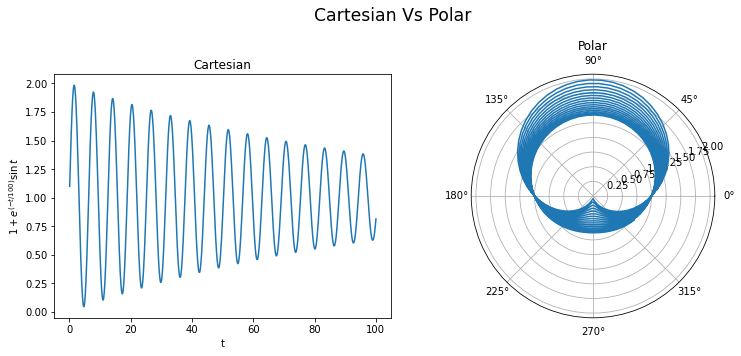

In [19]:
########################################################
#
# Horizontal Plot example.
#
# (1) Dropping the Figure and Axes elements 
#     This will be a [1x2] array and when plotting it
#     for each Axes that [1] dimension will collapse
#     See below.  I'm also making it extra wide so you can see
#.    it better.
# (2) Making Axes Titles for reference.
#     BUT WE WILL HAVE TO OVERWRITE ONE BELOW
# (3) Drop some *basic* graphs in each Axes
#     (0) Cartesian
# (4) Overwrite our second AXES and tell it to be polar.
# (5) Drop the Polar Graph Title
# (6) Drop the Polar Graph 

fig, ax = plt.subplots(nrows   =        1,  # One Row
                       ncols   =        2,  # 2 Columns
                       figsize =    [11,5]) # and a bigger than default plot

plt.suptitle("Cartesian Vs Polar",
             size = 'xx-large') # you can make things big or small!

# Axes [0] Left (a basic X-Y plot)

ax[0].set_title("Cartesian")
ax[0].plot(t, wave_func)
ax[0].set_xlabel("t")
ax[0].set_ylabel(r"$1 + e^{(-t/100)} \sin{t}$")

# Axes [1] Right (In polar-projected space.)

ax[1] = plt.subplot(1, # First Row
                    2, # Second Column
                    2, # Start at Position 2 starting at one
                    projection='polar')
ax[1].set_title("Polar")
ax[1].plot(t,wave_func)



plt.tight_layout()
plt.show()

#
########################################################

## Seaborn "Themes"

Unfortunately, some online examples that will sometimes include a "theme" from the [Seaborn](https://seaborn.pydata.org).  Themes are simply a number of preset graphic options that are designed to add some [style](https://seaborn.pydata.org/tutorial/aesthetics.html) beyond the boring default fonts and plot layouts that we've done above. It's really a matter of personal tastes.  

To activate "themes" you can use the [seaborn.set_theme()](https://seaborn.pydata.org/generated/seaborn.set_theme.html)

There are three basic themes, "darkgrid" (the default), "dark", "white" (my favorite), "whitegrid", and "ticks." 

The rotations below will give you a taste of the look-n-feel of these themes.

To "unset" use the [seaborn.reset_orig()](https://seaborn.pydata.org/generated/seaborn.reset_orig.html) function.

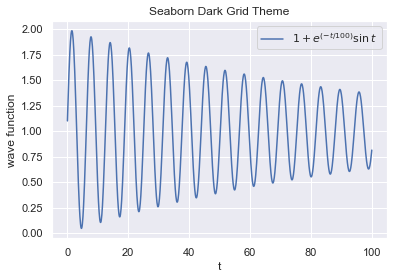

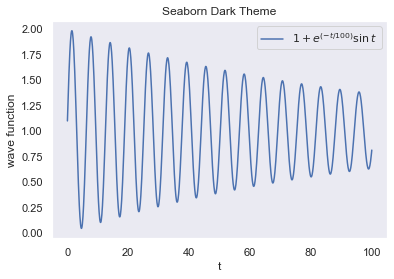

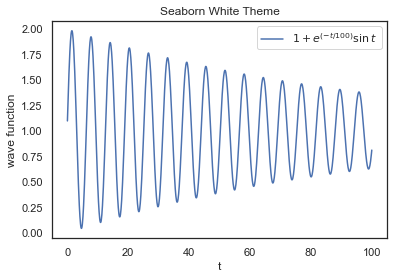

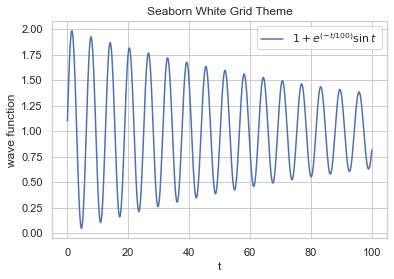

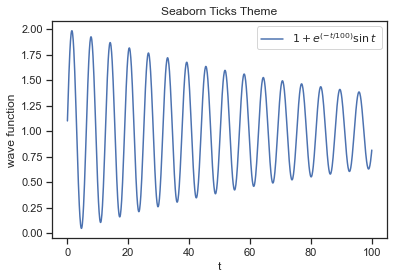

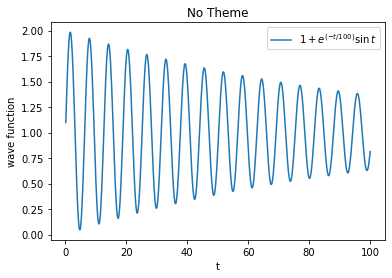

In [20]:
################################################################
#
# Theme Examples
#

# Seaborn Dark Grid Theme

sns.set_theme(style = "darkgrid")
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Seaborn Dark Grid Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


# Seaborn Dark Theme

sns.set_theme(style = "dark")
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Seaborn Dark Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


# Seaborn White Theme

sns.set_theme(style = "white")
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Seaborn White Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


# Seaborn White Grid Theme

sns.set_theme(style = "whitegrid")
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Seaborn White Grid Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


# Seaborn Ticks Theme

sns.set_theme(style = "ticks")
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("Seaborn Ticks Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


# Back to the Matplotlib Default "theme"

sns.reset_orig()
plt.plot(t, wave_func)                      # A basic xy plot
plt.title("No Theme")        # Always give your plot
plt.xlabel("t")                             #    labels or the TA
plt.ylabel("wave function")                 #    will dock you!
plt.legend([r"$1 + e^{(-t/100)} \sin{t}$"]) # This is a simple legend for fun
plt.show()                                  # And finally render the plot.


#
################################################################


## Conclusion

This sesison has hopefully been able to help you navigate some of the stranger elements of starting to get fancy in Python plotting as well as some of the tutorials where they drop everything down at once.

This session will also hopefully get you ready for other plotting procedures such as geospatial mapping (which will be on another module).

## Version Information

There was once a very handy tool that would print version information of the Python version, operating system, and the versions of the Python packages you are running. It leveraged a "magic" command in IPython (which is what lies beneath Jupyter and JuptyerLab notebooks).

The developer has moved on to other things but the resource still has a narrow but ~militant~ ernest fan base (myself included). The original doesn't work with versions of Python above 3.7. So a couple of us wrote some patches to fix it. You can access my version below following these instructions.

1.  If you don't have GIT on your rig yet, you can fetch it via conda

```
!conda install -y -v git
```

2.  You can install it using the following command.  

```
!pip install git+https://github.com/wjcapehart/version_information 
```

### JupyterLab Caveat

For people using Jupyter Lab, the interface does not play well with this "magic" function.  It basically exports it as a JSON object with clicky expander buttons.  However if you "Export" your notebook as an HTML or PDF file you should get a reasonable looking exported document.

In [21]:
################################################################
#
# Loading Version Information
#
%load_ext version_information

%version_information version_information, numpy, matplotlib, seaborn

#
################################################################

Software versions
Python 3.8.10 64bit [Clang 11.1.0 ]
IPython 7.24.1
OS macOS 11.4 x86_64 i386 64bit
version_information 1.0.3
numpy 1.20.3
matplotlib 3.4.2
seaborn 0.11.1
Fri Jun 18 12:52:44 2021 MDT